In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("data/seoul-air-quality.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3215 entries, 0 to 3214
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3215 non-null   object
 1    pm25   3215 non-null   object
 2    pm10   3215 non-null   object
 3    o3     3215 non-null   object
 4    no2    3215 non-null   object
 5    so2    3215 non-null   object
 6    co     3215 non-null   object
dtypes: object(7)
memory usage: 175.9+ KB


## Preprocessing data

In [4]:
data.replace(" ", "0", inplace = True)

In [5]:
data['date'] = pd.to_datetime(data['date'])

In [6]:
data.sort_values(by='date', ascending=False, inplace=True)

In [7]:
data.head()

,date,pm25,pm10,o3,no2,so2,co
21,2022-12-22,71,0,0,0,0,0
20,2022-12-21,104,41,21,15,3,4
19,2022-12-20,83,44,23,39,4,8
18,2022-12-19,53,36,7,44,4,7
17,2022-12-18,32,23,13,30,3,5


In [8]:
feature_dict = {" pm25":"pm25", " pm10":"pm10", " o3":"o3", " no2":"no2", " so2":"so2", " co":"co"}
data.rename(columns = feature_dict, inplace = True)
feature_list = ["pm25","pm10", "o3", "no2", "so2", "co"]
for feature in feature_list:
    data[feature] = data[feature].astype(float)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3215 entries, 21 to 3214
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3215 non-null   datetime64[ns]
 1   pm25    3215 non-null   float64       
 2   pm10    3215 non-null   float64       
 3   o3      3215 non-null   float64       
 4   no2     3215 non-null   float64       
 5   so2     3215 non-null   float64       
 6   co      3215 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 200.9 KB


In [71]:
names = list()
for i in range(3, 0 ,-1):
    names += [f'{name}(t-{i})' for name in feature_list]
for i in range(0,3):
    names += [f'{name}(t+{i})' for name in feature_list]
names
    

['pm25(t-3)',
 'pm10(t-3)',
 'o3(t-3)',
 'no2(t-3)',
 'so2(t-3)',
 'co(t-3)',
 'pm25(t-2)',
 'pm10(t-2)',
 'o3(t-2)',
 'no2(t-2)',
 'so2(t-2)',
 'co(t-2)',
 'pm25(t-1)',
 'pm10(t-1)',
 'o3(t-1)',
 'no2(t-1)',
 'so2(t-1)',
 'co(t-1)',
 'pm25(t+0)',
 'pm10(t+0)',
 'o3(t+0)',
 'no2(t+0)',
 'so2(t+0)',
 'co(t+0)',
 'pm25(t+1)',
 'pm10(t+1)',
 'o3(t+1)',
 'no2(t+1)',
 'so2(t+1)',
 'co(t+1)',
 'pm25(t+2)',
 'pm10(t+2)',
 'o3(t+2)',
 'no2(t+2)',
 'so2(t+2)',
 'co(t+2)']

In [184]:
def make_sequence(df, n_input, n_out=3):
    cols, names = list(), list()
    for i in range(n_input, 0, -1):
        cols.append(df.shift(-i))
        names += [f'{name}(t-{i})' for name in feature_list] 
    for i in range(0, n_out+1):
        cols.append(df.shift(i))
        if i == 0:
            names += [f'{name}(t)' for name in feature_list]
        else:
            names += [f'{name}(t+{i})' for name in feature_list]
    agg = pd.concat(cols, axis = 1)
    agg.columns = names
    agg.dropna(inplace = True)
    return agg

In [185]:
def split_dataset(data):
    # split data into train and test set
    train, test = data.iloc[:2000, 1: ], data.iloc[2000:,1:]
    return train, test

In [186]:
train_data, test_data = split_dataset(data)

In [187]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 21 to 1968
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm25    2000 non-null   float64
 1   pm10    2000 non-null   float64
 2   o3      2000 non-null   float64
 3   no2     2000 non-null   float64
 4   so2     2000 non-null   float64
 5   co      2000 non-null   float64
dtypes: float64(6)
memory usage: 109.4 KB


In [188]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215 entries, 1967 to 3214
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm25    1215 non-null   float64
 1   pm10    1215 non-null   float64
 2   o3      1215 non-null   float64
 3   no2     1215 non-null   float64
 4   so2     1215 non-null   float64
 5   co      1215 non-null   float64
dtypes: float64(6)
memory usage: 66.4 KB


In [189]:
train_data_sequence = make_sequence(train_data, 5, 1)

In [190]:
train_data_sequence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 20 to 1973
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pm25(t-5)  1994 non-null   float64
 1   pm10(t-5)  1994 non-null   float64
 2   o3(t-5)    1994 non-null   float64
 3   no2(t-5)   1994 non-null   float64
 4   so2(t-5)   1994 non-null   float64
 5   co(t-5)    1994 non-null   float64
 6   pm25(t-4)  1994 non-null   float64
 7   pm10(t-4)  1994 non-null   float64
 8   o3(t-4)    1994 non-null   float64
 9   no2(t-4)   1994 non-null   float64
 10  so2(t-4)   1994 non-null   float64
 11  co(t-4)    1994 non-null   float64
 12  pm25(t-3)  1994 non-null   float64
 13  pm10(t-3)  1994 non-null   float64
 14  o3(t-3)    1994 non-null   float64
 15  no2(t-3)   1994 non-null   float64
 16  so2(t-3)   1994 non-null   float64
 17  co(t-3)    1994 non-null   float64
 18  pm25(t-2)  1994 non-null   float64
 19  pm10(t-2)  1994 non-null   float64
 20  o3(t-2)

In [191]:
train_data_sequence.head()

,pm25(t-5),pm10(t-5),o3(t-5),no2(t-5),so2(t-5),co(t-5),pm25(t-4),pm10(t-4),o3(t-4),no2(t-4),...,o3(t),no2(t),so2(t),co(t),pm25(t+1),pm10(t+1),o3(t+1),no2(t+1),so2(t+1),co(t+1)
20,74.0,27.0,22.0,20.0,4.0,5.0,60.0,21.0,24.0,11.0,...,21.0,15.0,3.0,4.0,71.0,0.0,0.0,0.0,0.0,0.0
19,74.0,33.0,15.0,25.0,3.0,6.0,74.0,27.0,22.0,20.0,...,23.0,39.0,4.0,8.0,104.0,41.0,21.0,15.0,3.0,4.0
18,44.0,33.0,14.0,34.0,2.0,6.0,74.0,33.0,15.0,25.0,...,7.0,44.0,4.0,7.0,83.0,44.0,23.0,39.0,4.0,8.0
17,115.0,48.0,20.0,13.0,3.0,3.0,44.0,33.0,14.0,34.0,...,13.0,30.0,3.0,5.0,53.0,36.0,7.0,44.0,4.0,7.0
16,81.0,137.0,24.0,19.0,2.0,4.0,115.0,48.0,20.0,13.0,...,24.0,11.0,3.0,4.0,32.0,23.0,13.0,30.0,3.0,5.0


In [192]:
test_data_sequence= make_sequence(test_data, 5, 1)

In [193]:
output_list = list()
for i in range (1, 2):
    output_list += [f'{name}(t+{i})' for name in feature_list]
output_list

['pm25(t+1)', 'pm10(t+1)', 'o3(t+1)', 'no2(t+1)', 'so2(t+1)', 'co(t+1)']

In [194]:
X_train = train_data_sequence.drop(output_list, axis = 1)

In [195]:
y_train = train_data_sequence[output_list]

In [196]:
X_test = test_data_sequence.drop(output_list, axis = 1)

In [197]:
y_test = test_data_sequence[output_list]

## Model training

In [198]:
from xgboost import XGBRegressor

In [199]:
def train(train_x, train_y):
    model = XGBRegressor(n_estimators = 10, n_jobs = 20, gpu_id = 0)
    model.fit(train_x, train_y)
    return model
    
    

In [200]:
model_xgb = train(X_train, y_train)

## Model testing

In [201]:
from sklearn.metrics import mean_absolute_error, r2_score

In [202]:
def test(test_x, test_y, trained_model):
    preds = trained_model.predict(test_x)
    return mean_absolute_error(np.array(test_y["co(t+1)"]), preds[:,5]), r2_score(np.array(test_y["co(t+1)"]), preds[:,5]), preds

In [203]:
mae, r2, preds = test(X_test, y_test, model_xgb)

In [204]:
mae, r2

(1.4991314130148876, 0.25381809320372806)

In [205]:
import matplotlib.pyplot as plt

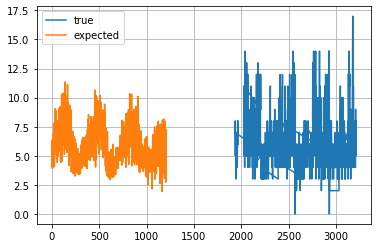

In [206]:
plt.plot(y_test["co(t+1)"], label='true')
plt.plot(preds[:,5], label='expected')
plt.legend()
plt.grid()
plt.show()

In [207]:
import pickle

In [208]:
pickle.dump(model_xgb, open('xgb.pkl', 'wb'))

In [212]:
data_selected = data.head(5).drop('date', axis = 1)

In [214]:
np.expand_dims(data_selected.to_numpy().flatten(), axis = 0)

array([[ 71.,   0.,   0.,   0.,   0.,   0., 104.,  41.,  21.,  15.,   3.,
          4.,  83.,  44.,  23.,  39.,   4.,   8.,  53.,  36.,   7.,  44.,
          4.,   7.,  32.,  23.,  13.,  30.,   3.,   5.]])

In [215]:
data.head(1)["date"]

21   2022-12-22
Name: date, dtype: datetime64[ns]

In [216]:
data.iloc[0]["date"]

Timestamp('2022-12-22 00:00:00')

In [219]:
data.iloc[4]["date"]

Timestamp('2022-12-18 00:00:00')

In [220]:
import hopsworks

In [261]:
project = hopsworks.login()
fs = project.get_feature_store()
air_quality_data = fs.get_feature_group(
        name = "air_quality",
        version = 7)
air_quality_dataframe = air_quality_data.read(dataframe_type = "pandas")

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/8358
Connected. Call `.close()` to terminate connection gracefully.
2022-12-28 17:43:52,577 INFO: USE `seoul_air_quality_featurestore`
2022-12-28 17:43:53,284 INFO: SELECT `fg0`.`date` `date`, `fg0`.`pm25` `pm25`, `fg0`.`pm10` `pm10`, `fg0`.`o3` `o3`, `fg0`.`no2` `no2`, `fg0`.`so2` `so2`, `fg0`.`co` `co`
FROM `seoul_air_quality_featurestore`.`air_quality_7` `fg0`


In [262]:
pd.to_datetime(air_quality_dataframe['date'])

0      2013-12-31
1      2014-01-01
2      2014-01-02
3      2014-01-03
4      2014-01-04
          ...    
3211   2022-12-19
3212   2022-12-20
3213   2022-12-21
3214   2022-12-22
3215   2022-12-28
Name: date, Length: 3216, dtype: datetime64[ns]

In [263]:
air_quality_dataframe.tail(6)

,date,pm25,pm10,o3,no2,so2,co
3210,1671321600000000000,32.0,23.0,13.0,30.0,3.0,5.0
3211,1671408000000000000,53.0,36.0,7.0,44.0,4.0,7.0
3212,1671494400000000000,83.0,44.0,23.0,39.0,4.0,8.0
3213,1671580800000000000,104.0,41.0,21.0,15.0,3.0,4.0
3214,1671667200000000000,71.0,0.0,0.0,0.0,0.0,0.0
3215,1672185600000000000,112.0,44.0,3.2,55.5,4.3,12.3


In [227]:
from datetime import datetime, date

In [224]:
data.date.apply(datetime.timestamp)

21      1.671635e+09
20      1.671548e+09
19      1.671462e+09
18      1.671376e+09
17      1.671289e+09
            ...     
3127    1.388761e+09
3126    1.388675e+09
3125    1.388588e+09
3124    1.388502e+09
3214    1.388416e+09
Name: date, Length: 3215, dtype: float64

In [243]:
int((datetime.strptime(str(date.today()),"%Y/%m/%d").timestamp()))

ValueError: time data '2022-12-28' does not match format '%Y/%m/%d'

In [252]:
data_clone  = data
data_clone["date"] = pd.to_datetime(date.today())
data_clone["date"] = data_clone["date"].astype(int)

In [253]:
data_clone

,date,pm25,pm10,o3,no2,so2,co
21,1672185600000000000,71.0,0.0,0.0,0.0,0.0,0.0
20,1672185600000000000,104.0,41.0,21.0,15.0,3.0,4.0
19,1672185600000000000,83.0,44.0,23.0,39.0,4.0,8.0
18,1672185600000000000,53.0,36.0,7.0,44.0,4.0,7.0
17,1672185600000000000,32.0,23.0,13.0,30.0,3.0,5.0
...,...,...,...,...,...,...,...
3127,1672185600000000000,0.0,49.0,10.0,38.0,7.0,6.0
3126,1672185600000000000,0.0,57.0,8.0,37.0,8.0,6.0
3125,1672185600000000000,0.0,53.0,3.0,62.0,11.0,11.0
3124,1672185600000000000,0.0,85.0,13.0,37.0,10.0,5.0
